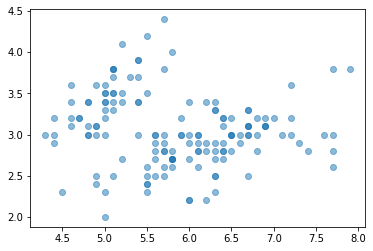

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets 

iris = datasets.load_iris()
samples = iris.data 
x = samples[:,0]
y = samples[:,1]

plt.scatter(x,y,alpha=0.5)
plt.show()
plt.clf()

In [4]:
from sklearn.cluster import KMeans
import numpy as np 

samples = iris.data 

model = KMeans(n_clusters= 3)

model.fit(samples)

new_samples = np.array([[5.7,4.4,1.5,0.4],[6.5,3.0,5.5,0.4],[5.8,2.7,5.1,1.9]])
labels = model.predict(new_samples)
print(labels)
new_names = [iris.target_names[label] for label in labels]
print(new_names)

[1 0 0]
['versicolor', 'setosa', 'setosa']


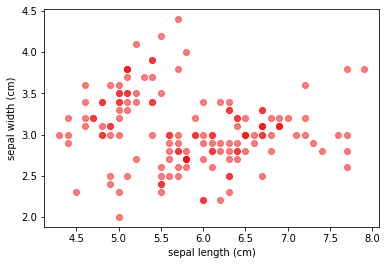

In [8]:
x = samples[:,0]
y = samples[:,1]

colors = ['r','g','b']
plt.scatter(x,y,color=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [10]:
import pandas as pd

target = iris.target
labels = [iris.target_names[s] for s in model.predict(samples)]
species = [iris.target_names[s] for s in list(target)]
df = pd.DataFrame({'labels':labels,'species':species})
print(df)    
ct = pd.crosstab(df['labels'],df['species'])
print(ct)

         labels    species
0    versicolor     setosa
1    versicolor     setosa
2    versicolor     setosa
3    versicolor     setosa
4    versicolor     setosa
..          ...        ...
145   virginica  virginica
146      setosa  virginica
147   virginica  virginica
148   virginica  virginica
149      setosa  virginica

[150 rows x 2 columns]
species     setosa  versicolor  virginica
labels                                   
setosa           0          48         14
versicolor      50           0          0
virginica        0           2         36


Cross-tabulation enable you to examine relationships within the data that might not be readily apparent when analyzing total survey responses. The first column has the cluster labels. The second to fourth columns have the iris species that are clustered into each of the labels. By looking at this, you can conclude that:

- iris setosa was clustered with 100% accuracy
- Iris versicolor was clusterde with 96% accuracy
- Iris verginica didnt do so well

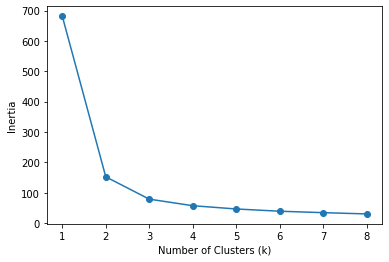

In [11]:
num_clusters = [i for i in range(1,9)]
inertias = []

for k in num_clusters:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Good clustering results in tight clusters, meaning that the samples in each cluster are bunched together. How spread out the clusters are is measured in inertia. Inertia is the distance from each sample to the centroid of its cluster. The lower the inertia is, the better our model has done

If the inertia is too large, the the clusters probably arent clumped close together. On the other hand, if there are too many clusters, the individual clusters might not be different enough from each other. The goal is to have low inertia and a small number of clusters. One of the ways to interpret this graph is to use the elbow method. CHoose an elbow in the inertia plot when inertia begins to decrease more slowly